# A gentle cheatsheet to RCP209
Author: Jonnie Soillers

Other cheatsheets:

* https://www.datacamp.com/blog/scikit-learn-cheat-sheet-python-machine-learning (HTML)
  http://datacamp-community-prod.s3.amazonaws.com/eb807da5-dce5-4b97-a54d-74e89f14266b (PDF)
  
Prerequisites:

* NumPy
* Matplotlib

So be prepared to do tricks such as

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(123)

X = np.random.rand(10, 3)
X = np.round(X)
X.mean(axis=0), X.std(axis=0)
np.unique(X, axis=0, return_counts=True)

plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_test [:, 0], y_test)

## Datasets

### Toy datasets built into Scikit-Learn

Loading datasets:

* ‘iris’
* ‘wine’

More info from the [documentation page](https://scikit-learn.org/stable/datasets/toy_dataset.html).

In [ ]:
from sklearn import datasets

iris_X, iris_y = datasets.load_iris(return_X_y=True)

### Synthetic datasets

Note that $X$ is a 2D array and $y$ a 1D array.

In [ ]:
np.random.seed(0)

X = 2 * np.random.rand(100, 1)
y = np.sin(X[:,0]) + 0.15 * np.random.randn(100)

## General commands

Doing the splits train/test

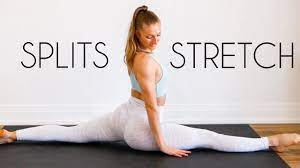

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Random state allows one to get reproducible results through the RNG

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.7, random_state=0)

Predict from test or new data

In [ ]:
model.predict(X_test)

So for instance, if you want to plot predicted vs true values

In [ ]:
plt.plot(model.predict(X_test), y_test)

You can also (at least for some classes of models, eg, tree classifiers) output probabilities

In [ ]:
model.predict_proba(X_test)

Goodness of fit can be evaluated using this

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(model.predict(X_test), y_test)

Also easy to compute with NumPy

In [ ]:
np.mean((model.predict(X_test) - y_test)**2)

## Linear regression

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

Compute the $R^2$ on the train and test set:

In [ ]:
reg.score(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

The quadratic mean square error can be computed using one of the following

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(reg.predict(X_train), y_train)

np.mean((reg.predict(X_train) - y_train)**2)

Coefficients:

In [ ]:
reg.coef_, reg.intercept_

Visualise the regression line ($x$ will be some `linspace` based on the domain of the dataset):

In [ ]:
plt.scatter(X_train, y_train)
plt.scatter(X_test,  y_test)
plt.plot(x, reg.predict(x))

Polynomial regression is a little bit more complicated; it is a special case of a linear regression except that it regresses the dependent variable $Y$ on polynomial features derived from $X$. So it is expressed as a pipeline (1) extract polynomial features and (2) regress and so it looks like this

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([('poly', PolynomialFeatures(degree=d)),
                 ('reg',  linear_model.LinearRegression())])
pipe.fit(X_train, y_train)

Polynomial regression provides a useful tool to demonstrate the perils of overfitting: increase $d$, the degree of the polynomial one wants to fit, and observe how the empirical error decreases towards zero while the out-of-sample error (estimated from the test dataset) reaches a minimum before starting to increase.

## Linear discriminant analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

## Grid search

In [ ]:
tuned_parameters = {'PARAM1': [VALUES..],
                    'PARAM2': [VALUES..], ..}

In [ ]:
model = GridSearchCV(SuperDuperModel(),
                     tuned_parameters, cv=5)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
reg.best_params_

Notes:

* The option `refit` is active by default and means that the final model returned by GridSearch is trained using all of `X_train` and `y_train`
* Other functions exist but are less commonly used; eg
    * `RandomizedSearchCV()` generates samples of parameter vectors using random distributions (from `scipy.stats`)
    * `HalvingGridSearchCV()` attempts to focus on promising regions of the parameter space

In [ ]:
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV

## Multilayer perceptron

Basically a class of feedforward neural networks able to perform both classification and regression.

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=1000, random_state=42)

clf.fit(X_train, y_train)

Important parameters:

* `solver='lbfgs'` works best for smallish datasets like the ones we use in class ;-)
* `hidden_layer_sizes`
* $\alpha$ `alpha` L2 penalty (regularization term) parameter; greater values of $\alpha$ constrain more strongly the models, which tends to become simpler

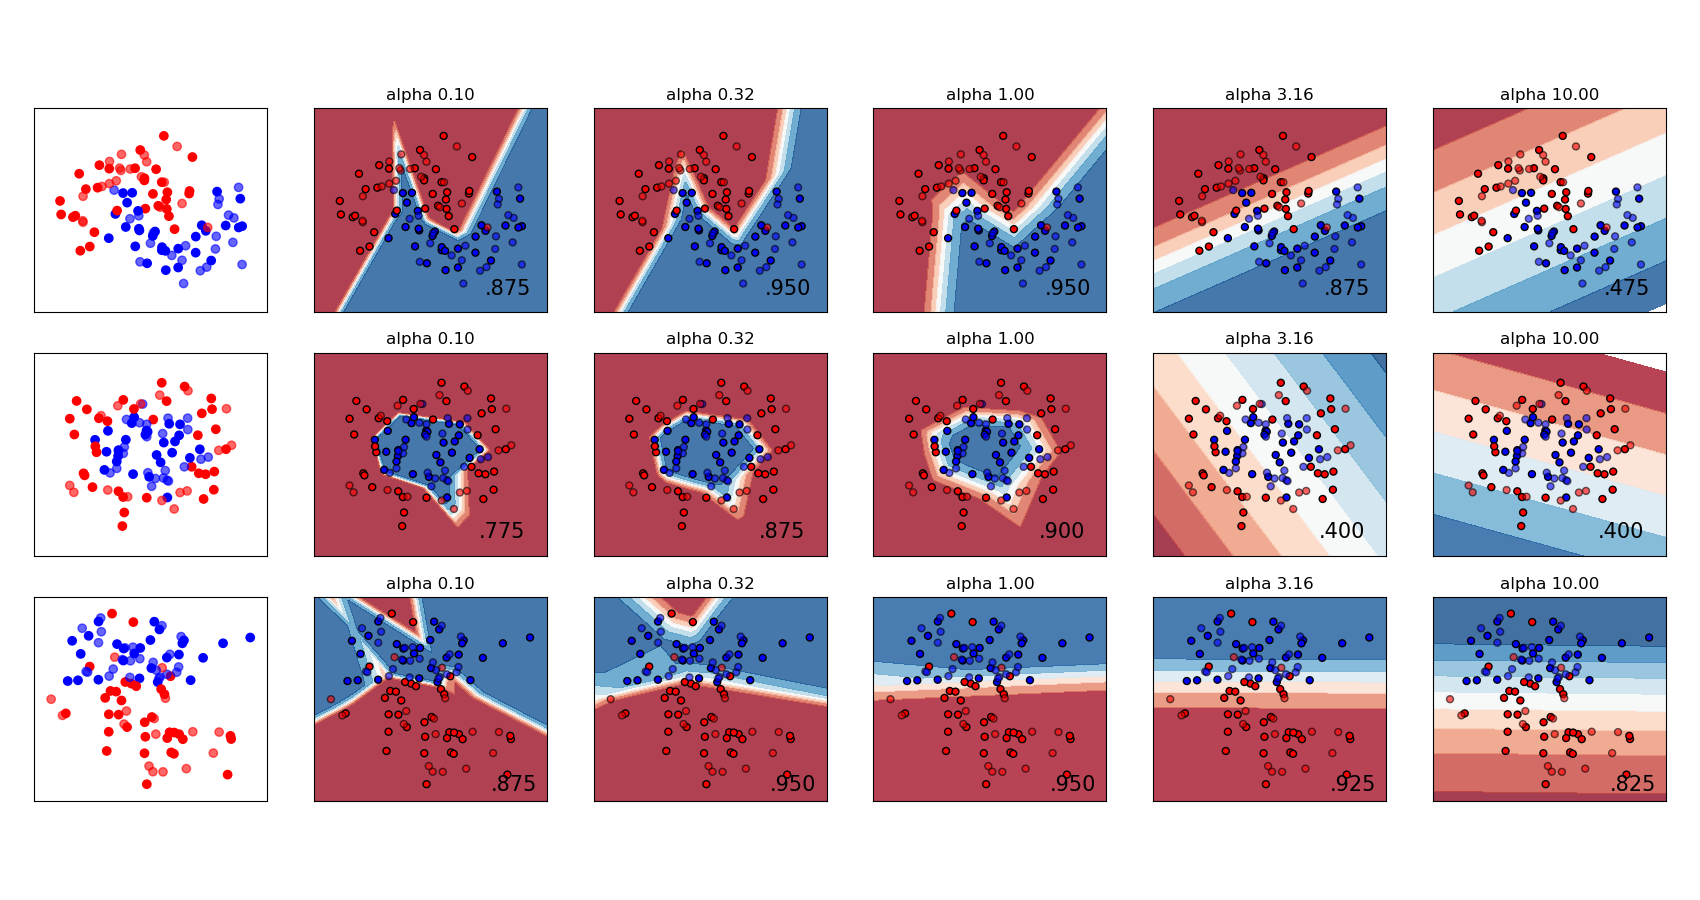

Source: https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html

## Decision trees

In [ ]:
from sklearn import tree

Classification problems

In [ ]:
clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

Plot the tree (either graphically or textually):

In [ ]:
tree.plot_tree(clf, filled=True)
tree.plot_tree(clf.best_es) # The clf that results from a GridSearch does not directly lend itself to a graphical visualisation

tree.export_text(clf)

Regression problems

In [ ]:
reg = tree.DecisionTreeRegressor()

reg.fig(X_train, y_train)
reg.score(X_test, y_test)

Important parameters

* `max_depth`
* `min_samples_leaf` (though it seems not so important from my limited experience during the practicals)

Decision trees can be used with grid search but the resulting models do not play well with some of the commands (cf. `plot_tree()`).